In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from scipy.optimize import minimize

# Multi-class Classification

## Part 1: Loading and Visualizing Data

X: (5000, 400)
y: (5000, 1)


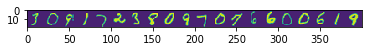

In [2]:
data = loadmat('ex3/ex3data1.mat')
X = data['X']
y = data['y']
print("X:",X.shape)
print("y:",y.shape)

s = np.random.choice(X.shape[0], 20)
plt.imshow(X[s,:].reshape(-1,20).T)
plt.show()

## Part 2a: Vectorize Logistic Regression

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def lrcost(theta, lamb, X, y):
    m = X.shape[0]

    # =========== code here ============
    h = sigmoid(np.dot(X, theta)).reshape(m, 1)
    J = -1/m * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + lamb / (2*m) * sum(np.square(theta[1:]))
    # ==================================

    return J

def lrgrad(theta, lamb, X, y):
    m = X.shape[0]
    n = X.shape[1]

    # =========== code here ============
    h = sigmoid(np.dot(X, theta)).reshape(m, 1)
    grad = 1/m * np.dot(X.T, h-y) + lamb/m * theta.reshape(n, 1)
    grad[0] = grad[0] - lamb / m * theta[0]
    # ==================================

    return grad.ravel()

## Part 2b: One-vs-All Training

In [4]:
a = np.ones((1,10))
b = np.ones((10,1))

print(a.shape,b.shape, np.dot(a,b).shape)

(1, 10) (10, 1) (1, 1)


In [5]:
def oneVsAll(X, y, num_labels, lamb):
    m = X.shape[0]
    n = X.shape[1]
    X = np.c_[np.ones((m, 1)), X]
    all_theta = np.zeros((num_labels, n + 1))

    # =========== code here ============
    for k in np.arange(1, num_labels + 1):
        init_theta = np.zeros((n + 1, 1))
        result = minimize(lrcost, init_theta,
                        args=(lamb, X, (y == k) * 1), method=None,
                        jac=lrgrad, options={'maxiter':50})
        all_theta[k - 1] = result.x
    # ==================================

    return all_theta

all_theta = oneVsAll(X, y, 10, 0.1)

## Predict for One-Vs-All

In [6]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0]
    X = np.c_[np.ones((m, 1)), X]

    # =========== code here ============
    probs = sigmoid(np.dot(X, all_theta.T))
    labels = np.argmax(probs, axis=1) + 1       # +1是因为类别为1～10
    # ==================================

    return labels 


labels = predictOneVsAll(all_theta, X)
acc = np.mean(labels.ravel() == y.ravel())

print('Trainning accuracy: {}%'.format(acc*100))

Trainning accuracy: 93.24%


# Neural Networks

## Part 1: Loading and Visualizing Data

X: (5000, 400)
y: (5000, 1)


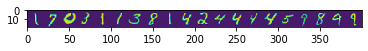

In [7]:
data = loadmat('ex3/ex3data1.mat')
X = data['X']
y = data['y']
print("X:",X.shape)
print("y:",y.shape)

s = np.random.choice(X.shape[0], 20)
plt.imshow(X[s,:].reshape(-1,20).T)
plt.show()

## Part 2: Loading Pameters

In [8]:
weights = loadmat('ex3/ex3weights.mat')
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']
print('Theta1:', Theta1.shape)
print('Theta2:', Theta2.shape)

Theta1: (25, 401)
Theta2: (10, 26)


## Part 3: Implement Predict

In [9]:
def predict(Theta1, Theta2, X):
    m = X.shape[0]
    X = np.c_[np.ones((m, 1)), X]
    
    # =========== code here ============
    z2 = np.dot(X, Theta1.T)
    a2 = np.c_[np.ones((m, 1)), sigmoid(z2)]
    z3 = np.dot(a2, Theta2.T)
    a3 = sigmoid(z3)
    labels = np.argmax(a3, axis=1) + 1
    # ==================================

    return labels.ravel()

labels = predict(Theta1, Theta2, X)
acc = np.mean(labels.ravel() == y.ravel())

print('Trainning accuracy: {}%'.format(acc*100))

Trainning accuracy: 97.52%
